In [ ]:
from fastai import *
from fastai.vision import *

import warnings
warnings.filterwarnings('ignore', message='Default grid_sample and affine_grid behavior will be changed ')

In [ ]:
path = Path('/home/kushaj/Desktop/Data/')
train_path = path/'trashdata/'
test_path = path/'trashtest'

print(train_path.ls())
print(test_path.ls())

[PosixPath('/home/kushaj/Desktop/Data/trashdata/metal'), PosixPath('/home/kushaj/Desktop/Data/trashdata/glass'), PosixPath('/home/kushaj/Desktop/Data/trashdata/paper'), PosixPath('/home/kushaj/Desktop/Data/trashdata/.DS_Store'), PosixPath('/home/kushaj/Desktop/Data/trashdata/cardboard'), PosixPath('/home/kushaj/Desktop/Data/trashdata/models'), PosixPath('/home/kushaj/Desktop/Data/trashdata/plastic')]
[PosixPath('/home/kushaj/Desktop/Data/trashtest/metal'), PosixPath('/home/kushaj/Desktop/Data/trashtest/glass'), PosixPath('/home/kushaj/Desktop/Data/trashtest/paper'), PosixPath('/home/kushaj/Desktop/Data/trashtest/cardboard'), PosixPath('/home/kushaj/Desktop/Data/trashtest/plastic')]


In [ ]:
src = (ImageList.from_folder(train_path)
                .split_by_rand_pct()
                .label_from_folder())

data = (src.transform(get_transforms(flip_vert=True), size=(150, 150))
           .databunch(bs=64, val_bs=128, num_workers=8)
           .normalize(imagenet_stats))

data_test = (ImageList.from_folder(test_path)
                      .split_none()
                      .label_from_folder()
                      .transform(size=(150, 150))
                      .databunch(num_workers=8, val_bs=128)
                      .normalize(imagenet_stats))

data_test.valid_dl = data_test.train_dl
data_test.train_dl = None

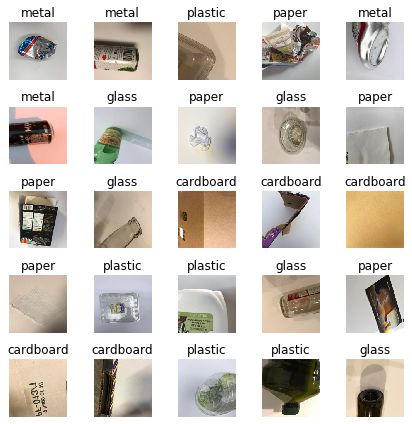

In [ ]:
data.show_batch(figsize=(6,6))

In [ ]:
# data_test.show_batch(ds_type=DatasetType.Valid, figsize=(6,6))

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=(3,3), stride=2),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.Conv2d(32, 32, kernel_size=(3,3), stride=2),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.Conv2d(32, 64, kernel_size=(3,3), stride=2),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            Flatten(),
            nn.Linear(256, 64),
            nn.Linear(64, 5)
        )
    
    def forward(self, x):
        return self.model(x)

In [ ]:
learn = Learner(data, Model(), metrics=[accuracy], callback_fns=ShowGraph)

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


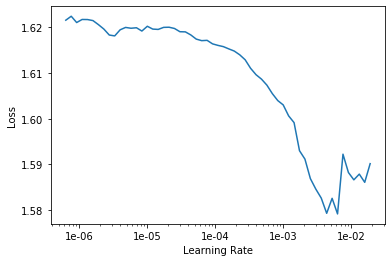

In [ ]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.542782,1.463070,0.294393,00:08
1,1.436077,1.298025,0.495327,00:08
2,1.392373,1.292280,0.549065,00:08
3,1.350788,1.311779,0.502336,00:08
4,1.306962,1.265130,0.542056,00:08
5,1.273102,1.197903,0.593458,00:08
6,1.227590,1.128651,0.595794,00:08
7,1.176085,1.083436,0.619159,00:08
8,1.131070,1.063395,0.635514,00:08
9,1.091297,1.060227,0.649533,00:08


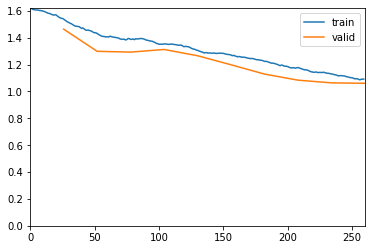

In [ ]:
learn.fit_one_cycle(10, max_lr=4e-3)

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


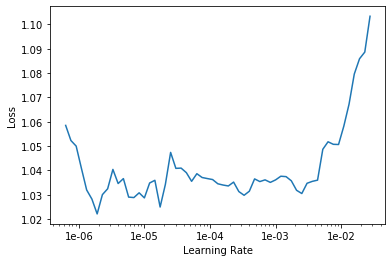

In [ ]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.047964,1.058133,0.649533,00:08
1,1.039978,1.053360,0.649533,00:08
2,1.033642,1.047861,0.651869,00:08
3,1.034384,1.044392,0.654206,00:08
4,1.035759,1.048725,0.654206,00:08
5,1.030861,1.039850,0.649533,00:08
6,1.024204,1.041950,0.656542,00:08
7,1.025228,1.040034,0.654206,00:08
8,1.017986,1.039811,0.654206,00:08
9,1.015864,1.039585,0.654206,00:08


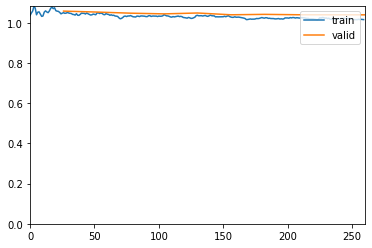

In [ ]:
learn.fit_one_cycle(10, max_lr=1e-4)

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


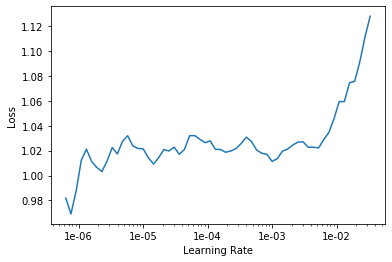

In [ ]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.018086,1.039572,0.651869,00:08
1,1.013058,1.038720,0.647196,00:08
2,1.017540,1.038618,0.651869,00:08
3,1.019391,1.038045,0.651869,00:08
4,1.022561,1.037942,0.649533,00:08
5,1.014731,1.037678,0.649533,00:08
6,1.017898,1.037241,0.647196,00:09
7,1.014350,1.036376,0.656542,00:08
8,1.014591,1.036464,0.649533,00:08
9,1.015270,1.037329,0.651869,00:08


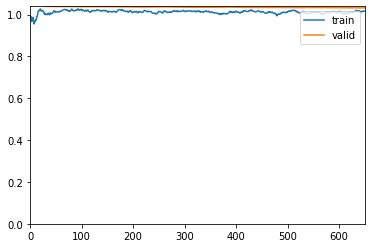

In [ ]:
learn.fit(25, lr=1e-5)

In [ ]:
learn.save('paper_150')

In [ ]:
learn.validate(dl=data_test.valid_dl)

[0.87420535, tensor(0.6667)]